<a href="https://colab.research.google.com/github/mbparsons/code/blob/master/Topic_Model_for_Quiksilver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiksilver Marketing & Product Insights through Amazon Product Reviews Topic Modeling

#Topic Descriptions
Topic 1: good backpacks for school
Topic 10: reviews in Spanish
Topic 11: cute clothes for children and babies
Topic 14: comfortable board shorts good for swimming and other activities
Topic 15: warm, comfortable, and soft hoodies
Topic 17: form-fitting and sturdy rash guards for swimming and surfing
Topic 20: shirts fit too large, buy a size smaller 
Topic 21: warm jackets for adults and children, prices a little high for Quiksilver Baby Boys' Buddy Jacket
Topic 23: people highly recommend and trust Quiksilver to make t-shirts with cool designs and colors like B00B2I789K Quiksilver Sultan Shirt
Topic 24: Some think the sandals are comfortable with nice colors, but others think they are sized a little small with high arches 
Topic 28: True-to-size shoes that take a while to wear in. Some say they run large, and some say they run small. B006ZP4K1Y Quiksilver shoe
Topic 29: Shipping costs are too high, and shirts came with defects like B005HGT65M – Men’s Scrappy T-Shirt
Topic 33: Sturdy, leather wallets with a coin pocket and zippers for security that people like B008EMFYXY Quiksilver Men’s Acute Wallet
#Preprocessing Steps
To preprocess the Amazon data, I first added the text from the reviews into a corpus. I then used tmtoolkit.preprocess to preprocess the data. I made all the words lowercase and removed the common tokens by a threshold of 0.8. I reduced the vocabulary size from 8066 tokens to 4943 tokens. I then saved the larger and smaller vocabularies as vocab_bg and vocab_sm, I also saved matrices of both for my next step of topic modeling.
#Model Steps
I used tmtoolkit[‘lda’] to create topic models of my data. I first picked the number of topics as 16 and computed the topics. I then evaluated my topic model and found 45 is the ideal number of topics in order to minimize and maximize. I next edited my number of topics and ran my topic model again. After that, I classified each review into the different topics.
Marketing & Product Insights
#Attributes that people like about our products
People like the comfort, colors, designs, and functionality of the clothes, shoes, wallets, and backpacks. People like the sun-proof and durable rash guards. They also like the multifunctional board shorts. Children think Quiksilver is a cool brand for clothes and backpacks.
#Attributes that people dislike about our products
People dislike that the shirts run large. They dislike that the shoes run either large or small. They dislike when prices are too high or their products are delivered with defects. Some also complain about the shoes taking time to wear in.
#Purchase Occasions
People buy Quiksilver rash guards and board shorts when they are going to the beach to surf or swim. People buy jackets for their children or themselves when it is about to be winter or for Christmas season. People buy flip flops for the beach or everyday wear. People also buy Quiksilver products as gifts.
#Product Development/Improvement Ideas
Quiksilver could make their shoe and t-shirt sizing more predictable. Quiksilver should make the shoes more comfortable right after purchase.
#Pricing Suggestions
Quiksilver could consider looking at its competitors’ pricing to insure its prices are set well because some customers think their prices are too high.
#What’s Not in the Data
I was surprised skate, skateboard was not a topic as many skateboarders wear Quiksilver clothes and shoes in California if they do or do not surf.
#Diving Further into the Data
I think Quiksilver should make the shoes immediately comfortable with no time to wear in, and the flip flops should have extra sturdy straps to not break after a day or two. Quiksilver should make the sizing more consistent. Quiksilver should also insure its pricing is competitive. Quiksilver should check all products before shipment for defects.

# Preprocessing


In [0]:
!pip install tmtoolkit

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle
import json

In [0]:
path = 'drive/My Drive/Colab Notebooks/Topic Modeling Project/meta_Clothing_Shoes_and_Jewelry.json'

In [0]:
products = open(path, 'r')

In [0]:
pathr = 'drive/My Drive/Colab Notebooks/Topic Modeling Project/reviews_Clothing_Shoes_and_Jewelry.json'

In [0]:
reviews = open(pathr, 'r')

In [0]:
from time import sleep

count=0
allreviews={}
for aline in reviews:
  count += 1
  if count % 100000 == 0:
    print(count)
  areviews = eval(aline)
  allreviews[count] = areviews
print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
from time import sleep

count=0
allproducts={}
for aline in products:
  count += 1
  if count % 100000 == 0:
    print(count)
  aproduct = eval(aline)
  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
allquiksilverasins = set()
count = 0
for areview in allproducts:
  theproduct = allproducts[areview]
  count += 1
  if count % 100000 == 0:
    print(count/1503384)
  for categories in theproduct['categories']:
    for acategory in categories:
      if 'quiksilver' in acategory.lower():
        allquiksilverasins.add(theproduct['asin'])
print(len(allquiksilverasins))

In [0]:
#outputfile = open('drive/My Drive/Colab Notebooks/Topic Modeling Project/quiksilverasins.txt', 'w')
#outputfile.write(','.join(allquiksilverasins))
#outputfile.close()

In [0]:
QuiksilverProducts ={}
count = 0
k = 0
for aproduct in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/1503384)
  aproduct = allproducts[aproduct]
  if 'brand' in aproduct:
    if aproduct['brand'] == 'Quiksilver':
      QuiksilverProducts[k] = aproduct
      k += 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
from time import sleep
allquiksilverasins = []
for data in open('drive/My Drive/Colab Notebooks/Topic Modeling Project/quiksilverasins.txt', 'r'):
  asins = data.split(',')
  for anasin in asins:
    allquiksilverasins.append(anasin)

In [0]:
quiksilverreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
    print(count/5748920)
  thereview = allreviews[areview]
  print(thereview.keys())
  sleep(30)
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if theasin in allquiksilverasins:
    thekey = '%s.%s' % (theasin, reviewerid)
    quiksilverreviews[thekey] = thereview
print(len(quiksilverreviews))
#json.dump(quiksilverreviews, open('drive/My Drive/Colab Notebooks/Topic Modeling Project/allquiksilverreviews.json', 'w'))
#allquiksilverreviews = json.load(open('drive/My Drive/Colab Notebooks/Topic Modeling Project/allquiksilverreviews.json', 'r'))

In [0]:
reviews = json.load(open('drive/My Drive/Colab Notebooks/Topic Modeling Project/allquiksilverreviews.json', 'r'))

In [0]:
len(reviews)

4811

In [0]:
import random
random.seed(20191120)
import numpy as np
np.set_printoptions(precision=5)
from tmtoolkit.corpus import Corpus

In [0]:
import codecs
import csv
import urllib 
corpus = Corpus()
TEXT_FIELD = 8

In [0]:
reviews

{'B0006G40JK.A30NLY3036PNS6': {'asin': 'B0006G40JK',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': 'Looks conservative to wear to the office and is COMFORTABLE',
  'reviewTime': '03 8, 2006',
  'reviewerID': 'A30NLY3036PNS6',
  'reviewerName': 'Charles R. Batey',
  'summary': 'I wear it to work',
  'unixReviewTime': 1141776000},
 'B0006G4216.A19IVZV1UQLEJC': {'asin': 'B0006G4216',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "This shirt was a great value and the Quicksilver quality can't be beat.  I'd definitely recommend purchasing this shirt.",
  'reviewTime': '09 4, 2007',
  'reviewerID': 'A19IVZV1UQLEJC',
  'reviewerName': 'Cynthia Mckinley "cyndysuwho"',
  'summary': 'Great Value',
  'unixReviewTime': 1188864000},
 'B0006G460S.AAAFFVZC2FCG8': {'asin': 'B0006G460S',
  'helpful': [1, 1],
  'overall': 5.0,
  'reviewText': 'These shorts were exactly what I wanted.  Sooo comfortable.  I will definitely wear these until they begin to fall apart, and then I will probab

In [0]:
type(reviews['B0006G40JK.A30NLY3036PNS6']['reviewText'])

str

In [0]:
text = []
for i in reviews:
  a = reviews[i]['reviewText']
  text.append(a)

In [0]:
asin = []
for i in reviews:
  s = reviews[i]['asin']
  asin.append(s)

In [0]:
len(asin)

4811

In [0]:
numbers = list(range(1,4811))

In [0]:
dict(zip(asin, text))

{'B0006G40JK': 'Looks conservative to wear to the office and is COMFORTABLE',
 'B0006G4216': "This shirt was a great value and the Quicksilver quality can't be beat.  I'd definitely recommend purchasing this shirt.",
 'B0006G460S': 'These shorts were exactly what I wanted.  Sooo comfortable.  I will definitely wear these until they begin to fall apart, and then I will probably patch them up to get as much life out of them as possible.  I may even order another pair if they go on sale again.  I love these shorts.',
 'B0006G477A': "I have been wary for some time about ordering shorts or pants online without trying them on, but when I saw these on the Friday Sale, I figured they were so cheap it was worth the risk. They fit exactly as advertised, which is not always the case with clothing companies selling on amazon. I have since bought 3 more pairs of shorts from Quicksilver through amazon, and they've all been terrific deals.",
 'B0006G4D60': "I bought these shorts to go on a cruise. Th

In [0]:
import pandas as pd

In [0]:
asinsreviews = pd.DataFrame(
    {'asin': asin,
     'review': text
    })

In [0]:
asinsreviews.reindex(numbers)

,asin,review
1,B0006G4216,This shirt was a great value and the Quicksilv...
2,B0006G460S,These shorts were exactly what I wanted. Sooo...
3,B0006G477A,I have been wary for some time about ordering ...
4,B0006G4D60,I bought these shorts to go on a cruise. They ...
5,B0006G4FTK,My husband love his shorts most of all the col...
...,...,...
4806,B00IO63P68,Purchased for our spring break trip... good f...
4807,B00IOR95DO,It did fit good... it is like size 37. The wa...
4808,B00IXXIN64,This is a great quality backpack. Looks just l...
4809,B00JPN5VXY,I like these polynosic rayon style shirts. Qui...


In [0]:
asinsreviews.iloc[1,]

asin                                             B0006G4216
review    This shirt was a great value and the Quicksilv...
Name: 1, dtype: object

In [0]:
for i, line in enumerate(text):
  corpus.add_doc(str(i+1), text[i])

In [0]:
corpus['1']

'Looks conservative to wear to the office and is COMFORTABLE'

In [0]:
corpus['4811']

'The towel is a good size but the material is pretty thin. I was expecting a fuller towel. The length is great and it works for me.'

In [0]:
len(text)

4811

In [0]:
asin

['B0006G40JK',
 'B0006G4216',
 'B0006G460S',
 'B0006G477A',
 'B0006G4D60',
 'B0006G4FTK',
 'B0006G4GZI',
 'B0006G4GZI',
 'B0006G4IRO',
 'B0006G4IRO',
 'B0006GEM48',
 'B0006GEZG8',
 'B0006GGQ6U',
 'B0009QWEFO',
 'B0009R4ZGO',
 'B0009R5018',
 'B0009R52PC',
 'B0009R58JC',
 'B0009R58OW',
 'B0009SS91K',
 'B000BB53Z0',
 'B000BF53K6',
 'B000CPZTK4',
 'B000CSK1MC',
 'B000E0E5J8',
 'B000E0IFJY',
 'B000E0KDMQ',
 'B000EY4BJS',
 'B000EY4CZQ',
 'B000EY6H4U',
 'B000FK7ZGM',
 'B000FK8EHG',
 'B000FK94K2',
 'B000FKBLGW',
 'B000FKCSBY',
 'B000FTPCKO',
 'B000FTPDS0',
 'B000I036AI',
 'B000IZE2Z6',
 'B000IZE2Z6',
 'B000JG4Z7Y',
 'B000JG4Z7Y',
 'B000JG4Z7Y',
 'B000JSBP7A',
 'B000JVILV0',
 'B000K3N2WU',
 'B000K3OZY4',
 'B000KJ086M',
 'B000KJ4ONA',
 'B000KJ9F2A',
 'B000KJ9G42',
 'B000KJBEJM',
 'B000KJDAMQ',
 'B000KJDBMU',
 'B000KJF3XU',
 'B000KM8136',
 'B000KM8136',
 'B000KM8136',
 'B000KVAP18',
 'B000KVBCZQ',
 'B000M34H3Q',
 'B000M34H3Q',
 'B000M34H3Q',
 'B000ME763S',
 'B000ME763S',
 'B000ME763S',
 'B000ME76

In [0]:
corpus

<Corpus [4812 documents]>

In [0]:
text

['Looks conservative to wear to the office and is COMFORTABLE',
 "This shirt was a great value and the Quicksilver quality can't be beat.  I'd definitely recommend purchasing this shirt.",
 'These shorts were exactly what I wanted.  Sooo comfortable.  I will definitely wear these until they begin to fall apart, and then I will probably patch them up to get as much life out of them as possible.  I may even order another pair if they go on sale again.  I love these shorts.',
 "I have been wary for some time about ordering shorts or pants online without trying them on, but when I saw these on the Friday Sale, I figured they were so cheap it was worth the risk. They fit exactly as advertised, which is not always the case with clothing companies selling on amazon. I have since bought 3 more pairs of shorts from Quicksilver through amazon, and they've all been terrific deals.",
 "I bought these shorts to go on a cruise. They were perfect. I wasn't sure how it was going to be to buy clothes o

(array([3.738e+03, 8.200e+02, 1.670e+02, 4.200e+01, 2.600e+01, 6.000e+00,
        5.000e+00, 5.000e+00, 2.000e+00, 1.000e+00]),
 array([   4. ,  252.8,  501.6,  750.4,  999.2, 1248. , 1496.8, 1745.6,
        1994.4, 2243.2, 2492. ]),
 <a list of 10 Patch objects>)

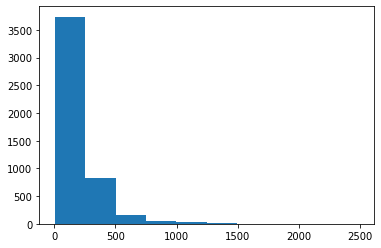

In [0]:
import matplotlib
matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()
preproc.lemmatize()
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()
preproc.add_stopwords(['http', 'nt'])

<TMPreproc [4811 documents]>

In [0]:
corpus['4811']

'The towel is a good size but the material is pretty thin. I was expecting a fuller towel. The length is great and it works for me.'

In [0]:
preproc.tokens['4811']

['the',
 'towel',
 'be',
 'a',
 'good',
 'size',
 'but',
 'the',
 'material',
 'be',
 'pretty',
 'thin',
 '',
 'i',
 'be',
 'expect',
 'a',
 'fuller',
 'towel',
 '',
 'the',
 'length',
 'be',
 'great',
 'and',
 'it',
 'work',
 'for',
 'me',
 '']

In [0]:
preproc.vocabulary_size

8066

In [0]:
#preproc.stem()

In [0]:
preproc.tokens['4811']

['the',
 'towel',
 'be',
 'a',
 'good',
 'size',
 'but',
 'the',
 'material',
 'be',
 'pretty',
 'thin',
 '',
 'i',
 'be',
 'expect',
 'a',
 'fuller',
 'towel',
 '',
 'the',
 'length',
 'be',
 'great',
 'and',
 'it',
 'work',
 'for',
 'me',
 '']

In [0]:
preproc.tokens_datatable

,doc,position,token,meta_pos
0,1,0,looks,NNP
1,1,1,conservative,JJ
2,1,2,to,TO
3,1,3,wear,VB
4,1,4,to,TO
...,...,...,...,...
19,999,19,with,IN
20,999,20,you,PRP
21,999,21,on,IN
22,999,22,other,JJ


In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
#preproc_smaller.remove_uncommon_tokens(df_threshold=0.0033)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

8066
4943


In [0]:
preproc_smaller.tokens_datatable

,doc,position,token,meta_pos
0,1,0,looks,NNP
1,1,1,office,NN
2,1,2,comfortable,NNP
0,10,0,great,NNP
1,10,1,shirt,NNP
...,...,...,...,...
6,998,6,kid,NNS
0,999,0,item,NN
1,999,1,future,NN
2,999,2,business,NN


In [0]:
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['great', 'kid', 'thong', 'that', 'be', 'comforatable', 'and', 'provide', 'support', '', 'we', 'have', 'nt', 'have', 'these', 'long', 'but', 'they', 'seem', 'well', 'construct', '', 'i', 'give', 'them', 'a', 'four', 'instead', 'of', 'a', 'five', 'because', 'my', 'son', 'say', 'that', 'they', 'be', 'a', 'little', 'stiff', '', 'he', 'like', 'them', 'to', '', 'flip', 'back', 'easily', '', 'when', 'he', 'walk', 'and', 'he', 'say', 'that', 'these', 'do', 'nt', 'always', 'do', 'that', '']
['great', 'thong', 'support', 'son', 'stiff']
['looks', 'conservative', 'to', 'wear', 'to', 'the', 'office', 'and', 'be', 'comfortable']
['looks', 'office', 'comfortable']
['the', 'quiksilver', 'mens', 'ignition', 'short', 'be', 'good', 'short', 'overall', '', 'the', 'selling', 'point', 'to', 'me', 'be', 'the', 'absence', 'of', 'flap', 'on', 'the', 'back', 'pocket', '', 'do', 'not', 'like', 'the', 'flap', 'if', 'they', 'roll', 'over', 'as', 'it', 'happen', 'with', 'most', 'short', '', '', 'i', 'give', 'it',

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005',
       '1006'], dtype='<U4')

In [0]:
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm
dtm_bg, dtm_sm

(<4811x8066 sparse matrix of type '<class 'numpy.int32'>'
 	with 155667 stored elements in Compressed Sparse Row format>,
 <4811x4943 sparse matrix of type '<class 'numpy.int32'>'
 	with 36966 stored elements in Compressed Sparse Row format>)

# Creating Models


In [0]:
!pip install tmtoolkit['lda']

In [0]:
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False
warnings.filterwarnings('ignore')

dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm,
}

lda_params = {
    'n_topics': 45,
    'eta': .01,
    'n_iter': 1000,
    'random_state': 20191122
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_bg = models['bigger'][0][1]
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=3)

topic_1
> #1.  (0.155530)
> #2. and (0.071295)
> #3. great (0.066250)
topic_2
> #1. the (0.160255)
> #2.  (0.049652)
> #3. i (0.038350)
topic_3
> #1. you (0.142130)
> #2.  (0.077924)
> #3. if (0.066395)
topic_4
> #1. the (0.067381)
> #2.  (0.052138)
> #3. and (0.051696)
topic_5
> #1.  (0.103284)
> #2. shirt (0.089440)
> #3. i (0.067465)
topic_6
> #1.  (0.145538)
> #2. a (0.085936)
> #3. great (0.074446)
topic_7
> #1.  (0.113955)
> #2. and (0.045816)
> #3. for (0.042461)
topic_8
> #1.  (0.139215)
> #2. with (0.086394)
> #3. very (0.085220)
topic_9
> #1. the (0.128716)
> #2.  (0.105118)
> #3. be (0.065139)
topic_10
> #1. a (0.131451)
> #2. it (0.084200)
> #3. be (0.069810)
topic_11
> #1.  (0.121547)
> #2. the (0.075346)
> #3. nt (0.070607)
topic_12
> #1.  (0.136249)
> #2. for (0.060600)
> #3. to (0.042381)
topic_13
> #1.  (0.103503)
> #2. the (0.084065)
> #3. i (0.072981)
topic_14
> #1.  (0.097687)
> #2. short (0.068965)
> #3. be (0.056183)
topic_15
> #1.  (0.150830)
> #2. i (0.091670)
>

In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words
model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)

topic_1
> #1. son (0.200369)
> #2. year (0.144588)
> #3. school (0.087668)
> #4. quality (0.077422)
> #5. great (0.046686)
topic_2
> #1. water (0.094632)
> #2. sun (0.065440)
> #3. time (0.058394)
> #4. beach (0.056380)
> #5. pool (0.036248)
topic_3
> #1. flop (0.164800)
> #2. flip (0.110473)
> #3. foot (0.081499)
> #4. pair (0.078783)
> #5. shoe (0.043470)
topic_4
> #1. quiksilver (0.137036)
> #2. quality (0.114730)
> #3. brand (0.084988)
> #4. clothing (0.058432)
> #5. style (0.055246)
topic_5
> #1. price (0.149632)
> #2. purchase (0.067548)
> #3. amazon (0.064431)
> #4. time (0.061314)
> #5. deal (0.050923)
topic_6
> #1. bag (0.119011)
> #2. backpack (0.115643)
> #3. pocket (0.063999)
> #4. pack (0.036493)
> #5. school (0.035932)
topic_7
> #1. color (0.244932)
> #2. picture (0.124946)
> #3. blue (0.061861)
> #4. person (0.034647)
> #5. one (0.032173)
topic_8
> #1. short (0.249596)
> #2. board (0.056824)
> #3. material (0.051413)
> #4. pocket (0.044649)
> #5. waist (0.033150)
topic_9

In [0]:
topics = print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)

topic_1
> #1. son (0.200369)
> #2. year (0.144588)
> #3. school (0.087668)
> #4. quality (0.077422)
> #5. great (0.046686)
topic_2
> #1. water (0.094632)
> #2. sun (0.065440)
> #3. time (0.058394)
> #4. beach (0.056380)
> #5. pool (0.036248)
topic_3
> #1. flop (0.164800)
> #2. flip (0.110473)
> #3. foot (0.081499)
> #4. pair (0.078783)
> #5. shoe (0.043470)
topic_4
> #1. quiksilver (0.137036)
> #2. quality (0.114730)
> #3. brand (0.084988)
> #4. clothing (0.058432)
> #5. style (0.055246)
topic_5
> #1. price (0.149632)
> #2. purchase (0.067548)
> #3. amazon (0.064431)
> #4. time (0.061314)
> #5. deal (0.050923)
topic_6
> #1. bag (0.119011)
> #2. backpack (0.115643)
> #3. pocket (0.063999)
> #4. pack (0.036493)
> #5. school (0.035932)
topic_7
> #1. color (0.244932)
> #2. picture (0.124946)
> #3. blue (0.061861)
> #4. person (0.034647)
> #5. one (0.032173)
topic_8
> #1. short (0.249596)
> #2. board (0.056824)
> #3. material (0.051413)
> #4. pocket (0.044649)
> #5. waist (0.033150)
topic_9

In [0]:
topics

In [0]:
#outputfile = open('drive/My Drive/Colab Notebooks/Topic Modeling Project/topics.txt', 'w')
#outputfile.write(str(print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=5)))
#outputfile.close()

# Evaluation

In [0]:
const_params = {'n_iter':1000,'eta':0.1,'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

In [0]:
plot_eval_results(results_by_n_topics)

45 topics looks good.


# Evaluation (lower beta)

In [0]:
const_params = {'n_iter':1000,'eta':0.01,'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

In [0]:
plot_eval_results(results_by_n_topics)

# Evaluation (higher beta)

In [0]:
const_params = {'n_iter':1000,'eta':0.5,'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/k) for k in ks]
print(varying_params)

In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

In [0]:
plot_eval_results(results_by_n_topics)

# Evaluation (lower alpha)



In [0]:
const_params = {'n_iter':1000,'eta':0.1,'random_state':20191122}
ks = list(range(1,302,20))
print(ks)
varying_params = [dict(n_topics=k, alpha=1/(k*10)) for k in ks]
print(varying_params)

In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [0]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
print(results_by_n_topics)

In [0]:
plot_eval_results(results_by_n_topics)

# Topic Names and Classification

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
doc_topic = model_sm.doc_topic_ #to classigy documents
doc_labels = np.array(preproc_smaller.doc_labels) #know labels for documents
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)
print(len(doc_topic))
print(len(doc_lengths_sm))
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_=.1
)

documentclassifications = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels)
for index, arow in documentclassifications.iterrows():
  documentclassifications.set_value(index, 'text', corpus[index])

4811
4811


In [0]:
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('surfboard')]
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
['I only bought it because it had the same name as a surfboard I got in 1970, called a Greg Noll Seeker, shaped by one of my huge shaping heroes, Yancy Spencer.  And sure enough, the wallet was great too!', '33_wallet (0.4897)']


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#documentclassifications.to_excel('drive/My Drive/Colab Notebooks/topics.documentclassification.xlsx')

Mounted at /content/drive


In [0]:
asinsreviews.iloc[2810,]

asin                                             B009VYK7EU
review    Love the fact I can buy it online instead of s...
Name: 2810, dtype: object

In [0]:
asinsreviews.iloc[4795,]

asin                                             B00IGZQ4R4
review    These are very light weight and will not stand...
Name: 4795, dtype: object

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#asinsreviews.to_excel('drive/My Drive/Colab Notebooks/asinsreviews.xlsx')

Mounted at /content/drive


In [0]:
allquiksilverasins2 = {}
count = 0
from time import sleep

for areview in allproducts:
  theproduct = allproducts[areview]
  allquiksilverasins2[areview] = {}
  if 'salesRank' in theproduct:
    for acategory in theproduct['salesRank']:
      allquiksilverasins2[areview]['rank'] = theproduct['salesRank'][acategory]
      print(areview, acategory, theproduct['salesRank'][acategory])
  sleep(2)

0000037214 Clothing 1233557
0000031887 Sports &amp; Outdoors 8547
0123456479 Kitchen & Dining 16987
0456844570 Clothing 1180499


KeyboardInterrupt: ignored

In [0]:
unsortedsalesrank = []
for aproduct in allquiksilverasins2:
  sortedsalesrank.append(allquiksilverasins2[aproduct], aproduct)

In [0]:
sortedsalesrank = sorted(unsortedsalesrank)

In [0]:
top100 = sortedsalesrank[0:100]

In [0]:
salesrank = []
for aproduct in sortedsalesrank:
  salesrank.append(aproduct[0])

In [0]:
print(salesrank[0:10])

In [0]:
import numpy as np
import seaborn as sns
x = np.random.randn(100)
ax = sns.distplot(salesrank[0:1000])